In [ ]:
# code modifed from
# workspace/nas100_vol2/projects/04_PFT/src/TOY2_modified/Training_with_v2/ver2_last_layer_GAP/PFT_toy2_TEST_FV2018_gradCAM(20210420).ipynb

In [ ]:
# get dataframe

In [1]:
weightpath_FEV1 = "/workspace/nas100_vol2/projects/04_PFT/PFT_FV_entire_regression_with_preprocessing_v3/PFT_FV_entire_v3_i3d_incepV1_FEV1_MEAS_1ch_nf140_00/weights/train_weights_epoch_096.h5"
weightpath_FVC = '/workspace/nas100_vol2/projects/04_PFT/PFT_FV_entire_regression_with_preprocessing_v3/PFT_FV_entire_v3_i3d_incepV1_FVC_MEAS_1ch_nf140_01/weights/train_weights_epoch_096.h5'

In [2]:
slice_interval = 1
#----

img_width, img_height = 180,178
epochs =150
batch_size = 10

_random_y = False
_augmentation = False
#-------
NUM_CH = 1
NUM_FRAMES = 140
slice_interval = 1



In [3]:
from datetime import datetime
print()
now = datetime.now().strftime("%y%m%d")
print(now)
print(datetime.now())


210814
2021-08-14 12:26:22.837361


In [4]:
import os

In [5]:
os.chdir("/workspace/nas100_vol2/projects/04_PFT/src/FIRST_VISITS_entire_set/Training")
os.getcwd()

%run "PFT_3D_CAM.py"

Using TensorFlow backend.


In [7]:
PATH_project_nas = "/workspace/lung_pft"

In [8]:
tr_num = "PFT_FV_entire_v3_Test_external_validation_FV2018"

In [9]:
#change path to your PC environment./
PATH_project = '/workspace/nas100_vol2/projects/04_PFT/'
PATH_lung = "/workspace/lung_pft"
PATH_data =os.path.join(PATH_lung, "external_validation")
input_folder = '03_crop_padded_v3_skimage_210511'
PATH_input = os.path.join(PATH_data, input_folder)
PATH_info = os.path.join(PATH_project, "data", "00_DATA_info")

TASK = 'PFT_FV_entire_I3D_regression_with_preprocessing_v3'

PATH_task = os.path.join(PATH_project, TASK)
if not os.path.isdir(PATH_task):
    os.mkdir(PATH_task)

PATH_trial = os.path.join(PATH_task, tr_num)
if not os.path.isdir(PATH_trial):
    os.mkdir(PATH_trial)
    

def print_paths():
    print("PATH_project: ", PATH_project)
    print("PATH_data: ", PATH_data)
    print("PATH_input: ", PATH_input)
    print("PATH_info: ", PATH_info)
    print("-----------------------")
    print("PATH_task: ", PATH_task)
    print("PATH_trial: ", PATH_trial)


# set GPU number build model

In [10]:
!nvidia-smi

Sat Aug 14 12:26:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 8000     Off  | 00000000:1B:00.0 Off |                  Off |
| 33%   34C    P0    73W / 260W |      0MiB / 48601MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Quadro RTX 8000     Off  | 00000000:1C:00.0 Off |                  Off |
| 43%   

In [11]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [12]:
# =============================================================================
# import keras and build model   ==? 이 부분은 따로 두고 이 모델을 공통으로 해서 처리해야겠다.
# =============================================================================
import keras
keras.backend.image_data_format()
print(keras.__version__)

#----
# 첫번째 방법

from keras.preprocessing import image
from keras import backend as K

#------
from i3d_inception_last_global import Inception_Inflated3d as I3d
from i3d_inception_last_global import conv3d_bn

#------
from keras.models import Model
from keras import layers
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Conv3D
from keras.layers import MaxPooling3D
from keras.layers import AveragePooling3D
from keras.layers import Dropout
from keras.layers import Reshape
from keras.layers import Lambda
from keras.layers import GlobalAveragePooling3D


K.clear_session()
K.set_learning_phase(0) 
n_classes = 1


###################################
# base model - 마지막 부분을 global average pooling으로 고침
###################################

base_model = I3d(include_top=False,
                weights=None,
#                 input_tensor=None,
                input_shape=(NUM_FRAMES,178,180,NUM_CH),
#                 dropout_prob=0.0,
                endpoint_logit=False, # softmax will be applied
                classes=n_classes
                ) 


# base_model.load_weights(weight_path)


##################################
# base model에서 마지막 average pooling을  제한다. - Global average pooling 이라고 되어 있는데  average pooling으로 되어 있어서.
##################################

x = base_model.output


# #################################
# # 아랫단은 v3에서 기반한 inflation 모델과 같게 한다.
# #################################

x = base_model.output
# x = Dropout(0.0)(x)
x = Dense(500, activation = "relu")(x)
# x = Dense(500, activation = "relu")(x)
prediction = Dense(1,activation = "linear" )(x)

#----------------------------------

model = Model(inputs=base_model.input, outputs=prediction)


2.1.2






# load_data_info


In [13]:
os.listdir("/workspace/nas100_vol2/projects/04_PFT/data/00_DATA_info/Test_Result/")

['PFT_LDCT_TEST_FV2018(210324).xlsx',
 'PFT_LDCT_TEST_Toy599(210319).xlsx',
 'PFT_LDCT_TEST_Toy599(210324).xlsx',
 'PFT_SDCT_sample300(210324).xlsx',
 'PFT_LDCT_TEST_FV2018_mask_info_tmp(0416).xlsx',
 'PFT_LDCT_TEST_FV2018(210324)_w_maskinfo(210416).xlsx',
 'PFT_SDCT_check_twoSeries(21416).xlsx',
 'PFT_SDCT_normal_lung_mask_info(210419).xlsx',
 'PFT_SDCT_normal_lung_mask_info_only(210419).xlsx',
 'PFT_LDCT_TEST_FV2018_mask_info_only(0496).xlsx',
 'PFT_LDCT_TEST_FV2018_w_mask_info(210419).xlsx',
 'PFT_toy2_TEST_SDCT_pre_op_CEpair_20210420.xlsx',
 'PFT_toy2_TEST_SDCT_pre_op_CEpair_w_info_20210420.xlsx',
 'PFT_toy2_TEST_SDCT_pre_op_CEpair_table_on_pair_20210420.xlsx',
 'PFT_LDCT_TEST_FV2018_w_mask_info(210419)_sm210422.xlsx',
 'PFT_LDCT_TEST_FV2018_w_mask_info(210426).xlsx',
 'PFT_LDCT_TEST_FV2018_outlier(210426).xlsx',
 'PFT_LDCT_weak_external_with_testresult_preprocessingv3(21Jul_first_result).xlsx']

In [14]:
# _src_path = os.path.join("/workspace/nas100_vol2/projects/04_PFT/PFT_FV_entire_I3D_regression_with_preprocessing_v3/PFT_FV_entire_v3_Test_external_validation_FV2018", "df_target_test_with_result.xlsx")

# _dst_path = os.path.join("/workspace/nas100_vol2/projects/04_PFT/data/00_DATA_info/Test_Result/",'PFT_LDCT_weak_external_with_testresult_preprocessingv3(21Jul_first_result).xlsx')

In [15]:
# import shutil
# shutil.copyfile(_src_path, _dst_path)

In [16]:
filepath = os.path.join("/workspace/nas100_vol2/projects/04_PFT/data/00_DATA_info/Test_Result/",'PFT_LDCT_weak_external_with_testresult_preprocessingv3(21Jul_first_result).xlsx')
print(filepath)

/workspace/nas100_vol2/projects/04_PFT/data/00_DATA_info/Test_Result/PFT_LDCT_weak_external_with_testresult_preprocessingv3(21Jul_first_result).xlsx


In [17]:
df_target = pd.read_excel(filepath, 
                         index_col = 0,
                         engine = "openpyxl")
list_new_key = []
for _key in df_target.keys():
    _new_key = _key.strip()
    list_new_key.append(_new_key)

df_target.columns = list_new_key

In [20]:
print(df_target.shape)
print(df_target.keys())

(2720, 90)
Index(['examID', 'ID_path', 'dir_name', 'target_path', 'check_dir_exist',
       '연구번호', 'HE0108(R5253A)검사접수번호', 'HE0109(R5253)검사접수번호', 'EXCEL',
       'PYTHON', '성별', '건진일자', '나이', '내원번호', '키', '체중', 'BMI', '허리둘레', 'SBP',
       'DBP', 'Q0002 귀하께서는 암을 진단 받은 적이 있습니까?',
       'Q0003 진단 받은 암을 선택해 주시겠습니까? (복수 응답 가능)',
       'Q0214 폐질환, 신장/요로/전립선질환, 간/담도질환, 식도/위/대장질환 및 갑상선 질환이 있습니까?',
       'Q0229 과거력(폐,비뇨기,소화기,갑상선) 을 선택해 주시겠습니까? (복수 응답 가능)',
       'Q0012 복용/주사 중인 약을 선택해 주시겠습니까? (복수 응답 가능)',
       'Q0016 시술 혹은 수술을 선택해주시겠습니까?(복수 응답 가능)', 'Q0047 귀하는 담배를 피운적이 있습니까?',
       'Q0048 처음 흡연을 시작한 연령은 몇 세입니까?', 'Q0049 흡연을 중단한 연령은 몇 세입니까?',
       'Q0050 하루 평균 흡연량은 얼마입니까? (현재 끊으신분도 과거 하루 평균 흡연량 표시바랍니다)',
       'Q0089 숨찬 증상이 있습니까?', 'Q0211 흉부 통증이 있습니까?',
       'Q0090 상기도 및 호흡기계 증상이 있습니까?', 'R5253A 접수일자', 'R5253A 결과본문', 'R5253A 결론',
       'R5253 접수일자', 'R5253 결과본문', 'R5253 결론', 'S2001 접수일자', 'S2001 결론',
       'S2002 접수일자', 'S2002 결론', 'FVC_PRED', 'FVC_MEAS', 'FVC_%PRED',
       'FE

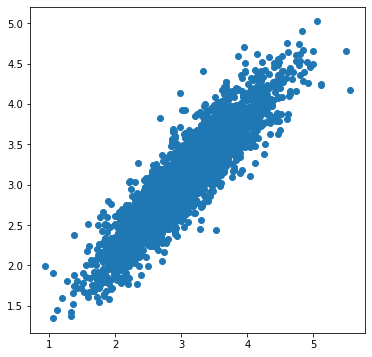

In [21]:
plt.figure(figsize = (6,6))
plt.scatter(df_target["FEV1_MEAS"], df_target['modelpredicted(FEV1_MEAS)'])

In [23]:
list_conv_idx = []

for i, layer in enumerate(model.layers):

    if 'conv' not in layer.name:
        continue
        
    else:

        list_conv_idx.append(i)
print(list_conv_idx)

list_mixed_idx = []

for i, layer in enumerate(model.layers):

    if 'Mixed' not in layer.name:
        continue
        
    else:

        list_mixed_idx.append(i)
print(list_mixed_idx)

[1, 5, 8, 12, 13, 19, 20, 21, 22, 32, 33, 39, 40, 41, 42, 53, 54, 60, 61, 62, 63, 73, 74, 80, 81, 82, 83, 93, 94, 100, 101, 102, 103, 113, 114, 120, 121, 122, 123, 133, 134, 140, 141, 142, 143, 154, 155, 161, 162, 163, 164, 174, 175, 181, 182, 183, 184]
[31, 51, 72, 92, 112, 132, 152, 173, 193]


In [24]:
import os
os.listdir("/workspace/lung_pft/external_validation/")

['01_copied',
 'PFT_LDCT_weak_external_01_copied_CTinfo(0312).xlsx',
 '02_resized',
 'PFT_LDCT_weak_external_02_resized_sizeinfo(0312).xlsx',
 'PFT_LDCT_weak_external_02_resized_check_needed(0315).xlsx',
 '03_crop_padded',
 'PFT_LDCT_weak_external_03_crop_padded(0315).xlsx',
 'PFT_LDCT_weak_external_03_crop_padded(0315)_with_histogram.xlsx',
 '0X_lung_seg_sample',
 '.ipynb_checkpoints',
 '04_lung_seg_mask',
 '_thumbnails',
 '02_resized_v3_skimage_210511',
 '02_resized_v3_skimage_210511_thumb',
 '03_crop_padded_v3_skimage_210511',
 '03_crop_padded_v3_skimage_210511_processing',
 'old_preprocessing_result_and_CAM',
 '05_CAM_with_v3',
 '05_CAM_with_v3_thumbnail_210811',
 'preprocessed_images',
 '06_ActivationMap_withv3_0814',
 '06_ActivationMap_thumb_0814',
 '07_ActivationMap_thumb_coronal_0814',
 '08_ActivationMap_thumb_sagittal_0814']

In [ ]:
# FEV1_MEAS
import shutil
PATH_input = PATH_input

target_var = "FEV1"
PATH_CAM =f"/workspace/lung_pft/external_validation/05_CAM_with_v3/{target_var}"
PATH_CAM_thumb = f"/workspace/lung_pft/external_validation/05_CAM_with_v3_thumbnail_210811/{target_var}"
PATH_CAM_thumb_cornal = f"/workspace/lung_pft/external_validation/05_CAM_with_v3_thumbnail_210811/coronal/{target_var}"
PATH_CAM_thumb_sagittal = f"/workspace/lung_pft/external_validation/05_CAM_with_v3_thumbnail_210811/sagittal_with_line/{target_var}"
if not os.path.isdir(PATH_CAM):
    make_sequential_path(PATH_CAM)
if not os.path.isdir(PATH_CAM_thumb):
    make_sequential_path(PATH_CAM_thumb)
if not os.path.isdir(PATH_CAM_thumb_cornal):
    make_sequential_path(PATH_CAM_thumb_cornal)
if not os.path.isdir(PATH_CAM_thumb_sagittal):
    make_sequential_path(PATH_CAM_thumb_sagittal)
    
    


    

    
#-------
weightpath = weightpath_FEV1
#---------------------------
print(weightpath)
model.load_weights(weightpath)
# K.set_learning_phase(False)


#--------------------------------------
df_tmp = df_target.copy()
print(df_tmp.shape)
list_layeridx2show = list_mixed_idx[-5:-4]


#--------------------------------------
for i, _row in tqdm(df_tmp.iterrows()):
    _examID = _row['HE0108(R5253A)검사접수번호']
    _path = os.path.join(PATH_input, f"{_examID}.hdr" )
#     _path_img = os.path.join(PATH_input, f"{_examID}.img" )  => 복사할 때 필요 했음.
#     _PATH_CAM_save = os.path.join(PATH_CAM, f"{_examID}.img")

#     # ID별로 폴더를 만든다.  => 샘플이 아니기 때문에 필요 없음
#     if not os.path.isdir(_PATH_ID):
#         os.mkdir(_PATH_ID)
#         print("made ID_path-------> ", _PATH_ID)
#     else:
#         pass
    
#     # sample 이미지를 옮긴다. 
#     try:
#         shutil.copy2(_path, _PATH_ID)
#     except OSError as err:
#         print(err)
#     try:
#         shutil.copy2(_path_img, _PATH_ID)
#     except OSError as err:
#         print(err)
    
        
    
#     print(_path)
    
    
    img = load_image(_path)     # model predict시 이용.
#     print("img shape:  ", img.shape)
    img = np.expand_dims(img, axis = 0) # bath dimension 넣어 준다. 
#     print("after expansion img shape:  ", img.shape)

    for _idx in list_layeridx2show:
        layer_name = model.layers[_idx].name
#         print( layer_name)

#         ##############
#         ## GradCAM  ##
#         ##############
        
    
        grad_CAM = GradCAM_3d(model, img, _idx)

#         print(grad_CAM.shape)
#         plot_3D_rough(grad_CAM, n_cols = 10)
        

        grad_CAM = resize_heatmap(img, grad_CAM)
        
        
        #-------------
        grad_CAM = min_max(grad_CAM)
        grad_CAM = make_type_to_int(grad_CAM)
        
        grad_CAM_savename = _examID
        
        moveaxis_grad_CAM = np.moveaxis(grad_CAM, [0,1], [1,0])
        moveaxis_grad_CAM = moveaxis_grad_CAM[::-1,:,:]
        
#         print(grad_CAM.shape)
        
#         save_to_3d(moveaxis_grad_CAM, PATH_CAM, grad_CAM_savename)
        
#         print("------------------> saved: ", grad_CAM_savename)
        
#         plot_3D_rough_full(grad_CAM,  _PATH_ID, grad_CAM_savename,n_cols = 10)
        img = np.squeeze(img)
#         print(img.shape,grad_CAM.shape )
#         plot_save_sagittal(grad_CAM, img, PATH_CAM_thumb, grad_CAM_savename)
        
    
    
#         #######################
#         ## AM: layer output  ##
#         #######################



#         layer_op = get_layer_op(model, img, _idx)


        
#         layer_AM = resize_heatmap(img, layer_op)
        
#         #-------------
#         layer_AM = min_max(layer_AM)
#         layer_AM = make_type_to_int(layer_AM)
        
#         moveaxis_layer_AM = np.moveaxis(layer_AM, [0,1], [1,0])
#         moveaxis_layer_AM = moveaxis_layer_AM[::-1,:,:]
        

#         grad_CAM_savename = _examID
#         save_to_3d(moveaxis_layer_AM, PATH_CAM, grad_CAM_savename)
        
# #         print("------------------> saved: ", grad_CAM_savename)
        
# #         plot_3D_rough_full(grad_CAM,  _PATH_ID, grad_CAM_savename,n_cols = 10)
#         img = np.squeeze(img)
# #         print(img.shape,grad_CAM.shape )




#---------------------------------------------------------------------------------------------------------------------------
#         plot_save_sagittal(layer_AM, img, PATH_CAM_thumb, grad_CAM_savename)
    
#---------------------------------------------------------------------------------------------------------------------------

        f, a, idx1, idx2 = plot_max_coronal(grad_CAM, img )

        plot_max_coronal_step2(f, a, df_tmp, target_var, PATH_CAM_thumb_cornal, grad_CAM_savename, _row)
        plt.close(f)
            
        plot_save_sagittal_with_line(grad_CAM,img,PATH_CAM_thumb_sagittal, grad_CAM_savename, idx1, idx2 )
#         break
#     break
        
#     break
        

/workspace/nas100_vol2/projects/04_PFT/PFT_FV_entire_regression_with_preprocessing_v3/PFT_FV_entire_v3_i3d_incepV1_FEV1_MEAS_1ch_nf140_00/weights/train_weights_epoch_096.h5


0it [00:00, ?it/s]

(2720, 90)


1872it [22:06:38, 81.94s/it]

In [ ]:
def bbox2_3D(img):

    r = np.any(img, axis=(1, 2))
    c = np.any(img, axis=(0, 2))
    z = np.any(img, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]

    return rmin, rmax, cmin, cmax, zmin, zmax


def bbox2_3D_w_gap(img, gap):

    r = np.any(img, axis=(1, 2))
    c = np.any(img, axis=(0, 2))
    z = np.any(img, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]
    
    rmin = rmin - gap
    rmax = rmax + gap
    cmin = cmin - gap
    cmax = cmax + gap
    zmin = zmin - gap
    zmax = zmax +gap
    

    return rmin, rmax, cmin, cmax, zmin, zmax

In [ ]:
def save_to_3d(_IMG, _SAVE_PATH , _ID):
    img= sitk.GetImageFromArray(_IMG)    
    output_filename = os.path.join(_SAVE_PATH, f"{_ID}.hdr")
    print(output_filename)
    sitk.WriteImage(img, output_filename)

In [ ]:
# https://stackoverflow.com/questions/31400769/bounding-box-of-numpy-array

In [ ]:
from skimage.transform import rescale, resize, downscale_local_mean
from tqdm import tqdm

for i, _row in tqdm(df_sample.iterrows()):
    
    _examID = _row['HE0108(R5253A)검사접수번호']
    # 1. import
    path_img = os.path.join(  "/workspace/lung_pft/external_validation/" , "03_crop_padded", f"{_examID}.hdr")
    path_lung = os.path.join(  "/workspace/lung_pft/external_validation/" , "04_lung_seg_mask/04_02_Lung_Mask_crop_padded", f"{_examID}.hdr")
    path_CAM = glob.glob(os.path.join(  "/workspace/lung_pft/external_validation" ,f"05_CAM_sample/{_examID}", f"*_{_examID}_FEV1_Mixed_4d.hdr"))[0]
    img = sitk.GetArrayFromImage(sitk.ReadImage(path_img))
    img_lung = sitk.GetArrayFromImage(sitk.ReadImage(path_lung))
#     img_CAM = sitk.GetArrayFromImage(sitk.ReadImage(path_CAM))

#     print(img_lung.shape, img_CAM.shape)
    
    # 2 get boundary box of img_lung    
    z1,z2, y1,y2,x1,x2 = bbox2_3D(img_lung)
    
    cropped_img = img[z1:z2, y1:y2, x1:x2]
    cropped_lung = img_lung[z1:z2, y1:y2, x1:x2]
    cropped_CAM = img_CAM[z1:z2, y1:y2, x1:x2]
#     save_to_3d(cropped_img, f"/workspace/lung_pft/external_validation/05_CAM_sample/{_examID}", f"{_examID}_cropped_before_resize")
#     save_to_3d(cropped_lung, f"/workspace/lung_pft/external_validation/05_CAM_sample/{_examID}", f"{_examID}_cropped_lung_before_resize")
#     save_to_3d(cropped_CAM, f"/workspace/lung_pft/external_validation/05_CAM_sample/{_examID}", f"{_examID}_cropped_CAM_before_resize")

    
    # set target ATLAS shape and resample CAM images = > scale의 문제
    target_shape = (120, 60, 90)
    
    resized_img = resize(cropped_img, target_shape,order = 3, 
#                          anti_aliasing=True, 
                         preserve_range= True)
    resized_lung =resize(cropped_lung, target_shape, order =0
                         ,preserve_range= True)  #mask nearest neighbor
    resized_CAM =resize(cropped_CAM, target_shape,order = 3, 
#                         anti_aliasing=True, 
                        preserve_range= True)  
    save_to_3d(resized_img, f"/workspace/lung_pft/external_validation/05_CAM_sample/{_examID}", f"{_examID}_cropped_after_resize")
    save_to_3d(resized_lung, f"/workspace/lung_pft/external_validation/05_CAM_sample/{_examID}", f"{_examID}_cropped_lung_after_resize")
    save_to_3d(resized_CAM, f"/workspace/lung_pft/external_validation/05_CAM_sample/{_examID}", f"{_examID}_cropped_CAM_after_resize")
    
    
#     break
    
    if i ==0:
        stacked_CAM = np.empty((len(df_tmp), target_shape[0], target_shape[1], target_shape[2]))
        stacked_lungmask = np.empty((len(df_tmp), target_shape[0], target_shape[1], target_shape[2]))
    stacked_CAM[i] =  resized_CAM
    stacked_lungmask[i] = resized_lung
    
averaged_CAM = np.average(stacked_CAM, axis = 0)
save_to_3d(averaged_CAM, f"/workspace/lung_pft/external_validation/05_CAM_sample", "average_CAM_10")
save_to_3d(stacked_lungmask, f"/workspace/lung_pft/external_validation/05_CAM_sample", "average_lung_10")

In [ ]:
averaged_CAM = np.average(stacked_CAM, axis = 0)
averaged_CAM = min_max(averaged_CAM)
averaged_CAM = make_type_to_int(averaged_CAM)

save_to_3d(averaged_CAM, f"/workspace/lung_pft/external_validation/05_CAM_sample", "average_CAM_10_min__maxed")


In [ ]:
plt.hist(averaged_CAM.ravel())

In [ ]:
plt.hist(stacked_lungmask.ravel())

In [ ]:
lung_mask_tmp = stacked_lungmask.copy()
lung_mask_tmp = np.average(lung_mask_tmp, axis = 0)
lung_mask_tmp = min_max(lung_mask_tmp)
lung_mask_tmp = make_type_to_int(lung_mask_tmp)
save_to_3d(lung_mask_tmp, f"/workspace/lung_pft/external_validation/05_CAM_sample", "average_lung_10_min_maxed_255")

In [ ]:
save_to_3d(stacked_lungmask, f"/workspace/lung_pft/external_validation/05_CAM_sample", "average_lung_10")

In [ ]:
# df_tmp.to_excel(os.path.join("/workspace/lung_pft/external_validation/05_CAM", "FV2018_sample_300.xlsx"))

In [ ]:
# 300건/5시간

In [ ]:

plt.scatter(df_tmp.sort_values(by = "FEV1_MEAS", ascending = True).reset_index().index, df_tmp.sort_values(by = "FEV1_MEAS", ascending = True)["FEV1_MEAS"])

In [ ]:
df_tmp.keys()

In [ ]:
df_tmp_sorted_by_FEV1= df_tmp.sort_values(by = "FEV1_MEAS", ascending = True).reset_index(drop = False)



plt.scatter(df_2018["FEV1_MEAS"],df_2018['modelpredicted(FEV1_MEAS)'] )
plt.scatter(df_tmp_sorted_by_FEV1["FEV1_MEAS"],df_tmp_sorted_by_FEV1['modelpredicted(FEV1_MEAS)'] )

plt.xlabel("FEV1_MEAS")
plt.ylabel("FEV1_MEAS estimation")
plt.savefig(os.path.join("/workspace/lung_pft/external_validation/05_CAM", "FV2018_sample_300_FEV1_meas"))

In [ ]:
df_tmp_sorted_by_FEV1= df_tmp.sort_values(by = "FEV1_MEAS", ascending = True).reset_index(drop = False)



plt.scatter(df_2018[""],df_2018['modelpredicted(FEV1_MEAS)'] )
plt.scatter(df_tmp_sorted_by_FEV1["FEV1_MEAS"],df_tmp_sorted_by_FEV1['modelpredicted(FEV1_MEAS)'] )

plt.xlabel("FEV1_MEAS")
plt.ylabel("FEV1_MEAS estimation")
plt.savefig(os.path.join("/workspace/lung_pft/external_validation/05_CAM", "FV2018_sample_300_FEV1_meas"))

In [ ]:
df_tmp_sorted_by_FEV1.head()
df_tmp_sorted_by_FEV1.to_excel(os.path.join("/workspace/lung_pft/external_validation/05_CAM", "FV2018_sample_300_sorted_by_FEV1.xlsx"))

In [ ]:
df_tmp.shape

In [ ]:
from skimage.transform import rescale, resize, downscale_local_mean
from tqdm import tqdm


df_tmp = df_2018.sample(n = 300, random_state =30).reset_index(drop = True)
#------------------------------------------------------------------------------------

import shutil
PATH_input = "/workspace/lung_pft/external_validation/03_crop_padded"
PATH_CAM_sample ="/workspace/lung_pft/external_validation/05_CAM"
# PATH_CAM_sample = "/workspace/nas100_vol2/projects/04_PFT/data/Toy2_3000/LAYER_OP_sample_0324"
if not os.path.isdir(PATH_CAM_sample):
    os.mkdir(PATH_CAM_sample)
    
    #-------
weightpath = "/workspace/nas100_vol2/projects/04_PFT/PFT_TOY2_I3D_regression_with_preprocessing_v2/result_PFT_TOY2_v2_i3d_incepV1_FEV1_MEAS_1ch_nf140_00/weights/train_weights_epoch_117.h5"
print(weightpath)
model.load_weights(weightpath)
K.set_learning_phase(0) 


#--------------------------------------

list_layeridx2show = list_mixed_idx[-5:-4]


#--------------------------------------
for i, _row in df_tmp.iterrows():
    print(i)
    _examID = _row['HE0108(R5253A)검사접수번호']
    _path = os.path.join(PATH_input, f"{_examID}.hdr" )
    _path_img = os.path.join(PATH_input, f"{_examID}.img" )
    _PATH_ID = os.path.join(PATH_CAM_sample, str(_examID))
    # ID별로 폴더를 만든다.
    if not os.path.isdir(_PATH_ID):
        os.mkdir(_PATH_ID)
        print("made ID_path-------> ", _PATH_ID)
    else:
        pass
    
    # sample 이미지를 옮긴다. 
    try:
        shutil.copy2(_path, _PATH_ID)
    except OSError as err:
        print(err)
    try:
        shutil.copy2(_path_img, _PATH_ID)
    except OSError as err:
        print(err)
    
        
    
    print(_path)
    
    
    img = load_image(_path)     # model predict시 이용.
#     save_to_3d(img_3d, PATH_CAM_sample, "img_3d_by_load_array")
#     save_to_3d(img, PATH_CAM_sample, "img_by_load_image")
    
    img = np.expand_dims(img, axis = 0) # bath dimension 넣어 준다. 
    
    
    
    
#     print(img_3d.shape)
    print("img shape:  ", img.shape)

    for _idx in list_layeridx2show:
        layer_name = model.layers[_idx].name
        print( layer_name)

        ##############
        ## GradCAM  ##
        ##############
        
    
        grad_CAM = GradCAM_3d(model, img, _idx)

#         print(grad_CAM.shape)
#         plot_3D_rough(grad_CAM, n_cols = 10)
        

        grad_CAM = resize_heatmap(img, grad_CAM)
        
        
        #-------------
        grad_CAM = min_max(grad_CAM)
        grad_CAM = make_type_to_int(grad_CAM)
        
        grad_CAM_savename = f"{i}_{_examID}_FEV1_{layer_name}"
        
        moveaxis_grad_CAM = np.moveaxis(grad_CAM, [0,1], [1,0])
        moveaxis_grad_CAM = moveaxis_grad_CAM[::-1,:,:]
        
        print(grad_CAM.shape)
        
        save_to_3d(moveaxis_grad_CAM, _PATH_ID, grad_CAM_savename)
        
        print("------------------> saved: ", grad_CAM_savename)
        
#         plot_3D_rough_full(grad_CAM,  _PATH_ID, grad_CAM_savename,n_cols = 10)
        img = np.squeeze(img)
        print(img.shape,grad_CAM.shape )
        plot_save_sagittal(grad_CAM, img, _PATH_ID, grad_CAM_savename)
        














In [ ]:
li

In [ ]:
list_ID_saving_after_resize = []
#-------------------------------------------------------------------------------------------------------------------------

for i, _row in tqdm(df_tmp.iterrows()):
    
    _examID = _row['HE0108(R5253A)검사접수번호']
    # 1. import
    path_img = os.path.join(  "/workspace/lung_pft/external_validation/" , "03_crop_padded", f"{_examID}.hdr")
    path_lung = os.path.join(  "/workspace/lung_pft/external_validation/" , "04_lung_seg_mask/04_02_Lung_Mask_crop_padded", f"{_examID}.hdr")
    path_CAM = glob.glob(os.path.join(  "/workspace/lung_pft/external_validation" ,f"05_CAM/{_examID}", f"*_{_examID}_FEV1_Mixed_4d.hdr"))[0]
    img = sitk.GetArrayFromImage(sitk.ReadImage(path_img))
    img_lung = sitk.GetArrayFromImage(sitk.ReadImage(path_lung))
#     img_CAM = sitk.GetArrayFromImage(sitk.ReadImage(path_CAM))

#     print(img_lung.shape, img_CAM.shape)
    
    # 2 get boundary box of img_lung    
    z1,z2, y1,y2,x1,x2 = bbox2_3D(img_lung)
    
    cropped_img = img[z1:z2, y1:y2, x1:x2]
    cropped_lung = img_lung[z1:z2, y1:y2, x1:x2]
    cropped_CAM = img_CAM[z1:z2, y1:y2, x1:x2]

    target_shape = (120, 60, 90)
    resized_img = resize(cropped_img, target_shape,order = 3, 
#                          anti_aliasing=True, 
                         preserve_range= True)
    resized_lung =resize(cropped_lung, target_shape, order =0
                         ,preserve_range= True)  #mask nearest neighbor
    resized_CAM =resize(cropped_CAM, target_shape,order = 3, 
#                         anti_aliasing=True, 
                        preserve_range= True)  

    
    
#     break
    
    if i ==0:
        stacked_CAM = np.empty((len(df_tmp), target_shape[0], target_shape[1], target_shape[2]))
        stacked_lungmask = np.empty((len(df_tmp), target_shape[0], target_shape[1], target_shape[2]))
        
    stacked_CAM[i] =  resized_CAM
    stacked_lungmask[i] = resized_lung
    
    if i%15==0:
        list_ID_saving_after_resize.append(_examID)
        save_to_3d(resized_img, f"/workspace/lung_pft/external_validation/05_CAM/{_examID}", f"{_examID}_cropped_after_resize")
        save_to_3d(resized_lung, f"/workspace/lung_pft/external_validation/05_CAM/{_examID}", f"{_examID}_cropped_lung_after_resize")
        save_to_3d(resized_CAM, f"/workspace/lung_pft/external_validation/05_CAM/{_examID}", f"{_examID}_cropped_CAM_after_resize")
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
averaged_CAM = np.average(stacked_CAM, axis = 0)
averaged_CAM = min_max(averaged_CAM)
averaged_CAM = make_type_to_int(averaged_CAM)
save_to_3d(averaged_CAM, f"/workspace/lung_pft/external_validation/05_CAM", "average_CAM_300_210421")


averaged_lungmask = np.average(stacked_lungmask, axis = 0)
averaged_lungmask = min_max(averaged_lungmask)
averaged_lungmask = make_type_to_int(averaged_lungmask)

save_to_3d(averaged_lungmask, f"/workspace/lung_pft/external_validation/05_CAM", "average_lung_mask_300_210421")
    
    
#     break

In [ ]:
list_ID_saving_after_resize

# FVC

In [ ]:
from skimage.transform import rescale, resize, downscale_local_mean
from tqdm import tqdm


# df_tmp = df_2018.sample(n = 300, random_state =30).reset_index(drop = True)
#------------------------------------------------------------------------------------

import shutil
PATH_input = "/workspace/lung_pft/external_validation/03_crop_padded"
PATH_CAM_sample ="/workspace/lung_pft/external_validation/05_CAM_FVC"
# PATH_CAM_sample = "/workspace/nas100_vol2/projects/04_PFT/data/Toy2_3000/LAYER_OP_sample_0324"
if not os.path.isdir(PATH_CAM_sample):
    os.mkdir(PATH_CAM_sample)
    
    #-------
weightpath = '/workspace/nas100_vol2/projects/04_PFT/PFT_TOY2_I3D_regression_with_preprocessing_v2/result_PFT_TOY2_v2_i3d_incepV1_FVC_MEAS_1ch_nf140_00/weights/train_weights_epoch_130.h5'
print(weightpath)
model.load_weights(weightpath)
K.set_learning_phase(0) 


#--------------------------------------

list_layeridx2show = list_mixed_idx[-5:-4]


#--------------------------------------
for i, _row in df_tmp.iterrows():
    print(i)
    _examID = _row['HE0108(R5253A)검사접수번호']
    _path = os.path.join(PATH_input, f"{_examID}.hdr" )
    _path_img = os.path.join(PATH_input, f"{_examID}.img" )
    _PATH_ID = os.path.join(PATH_CAM_sample, str(_examID))
    # ID별로 폴더를 만든다.
    if not os.path.isdir(_PATH_ID):
        os.mkdir(_PATH_ID)
        print("made ID_path-------> ", _PATH_ID)
    else:
        pass
    
    # sample 이미지를 옮긴다. 
    try:
        shutil.copy2(_path, _PATH_ID)
    except OSError as err:
        print(err)
    try:
        shutil.copy2(_path_img, _PATH_ID)
    except OSError as err:
        print(err)
    
        
    
    print(_path)
    
    
    img = load_image(_path)     # model predict시 이용.
#     save_to_3d(img_3d, PATH_CAM_sample, "img_3d_by_load_array")
#     save_to_3d(img, PATH_CAM_sample, "img_by_load_image")
    
    img = np.expand_dims(img, axis = 0) # bath dimension 넣어 준다. 
    
    
    
    
#     print(img_3d.shape)
    print("img shape:  ", img.shape)

    for _idx in list_layeridx2show:
        layer_name = model.layers[_idx].name
        print( layer_name)

        ##############
        ## GradCAM  ##
        ##############
        
    
        grad_CAM = GradCAM_3d(model, img, _idx)

#         print(grad_CAM.shape)
#         plot_3D_rough(grad_CAM, n_cols = 10)
        

        grad_CAM = resize_heatmap(img, grad_CAM)
        
        
        #-------------
        grad_CAM = min_max(grad_CAM)
        grad_CAM = make_type_to_int(grad_CAM)
        
        grad_CAM_savename = f"{i}_{_examID}_FVC_{layer_name}"
        
        moveaxis_grad_CAM = np.moveaxis(grad_CAM, [0,1], [1,0])
        moveaxis_grad_CAM = moveaxis_grad_CAM[::-1,:,:]
        
        print(grad_CAM.shape)
        
        save_to_3d(moveaxis_grad_CAM, _PATH_ID, grad_CAM_savename)
        
        print("------------------> saved: ", grad_CAM_savename)
        
#         plot_3D_rough_full(grad_CAM,  _PATH_ID, grad_CAM_savename,n_cols = 10)
        img = np.squeeze(img)
        print(img.shape,grad_CAM.shape )
        plot_save_sagittal(grad_CAM, img, _PATH_ID, grad_CAM_savename)
        














In [ ]:
list_ID_saving_after_resize = []
#-------------------------------------------------------------------------------------------------------------------------

for i, _row in tqdm(df_tmp.iterrows()):
    
    _examID = _row['HE0108(R5253A)검사접수번호']
    # 1. import
    path_img = os.path.join(  "/workspace/lung_pft/external_validation/" , "03_crop_padded", f"{_examID}.hdr")
    path_lung = os.path.join(  "/workspace/lung_pft/external_validation/" , "04_lung_seg_mask/04_02_Lung_Mask_crop_padded", f"{_examID}.hdr")
    path_CAM = glob.glob(os.path.join(  "/workspace/lung_pft/external_validation" ,f"05_CAM_FVC/{_examID}", f"*_{_examID}_FVC_Mixed_4d.hdr"))[0]
    img = sitk.GetArrayFromImage(sitk.ReadImage(path_img))
    img_lung = sitk.GetArrayFromImage(sitk.ReadImage(path_lung))
#     img_CAM = sitk.GetArrayFromImage(sitk.ReadImage(path_CAM))

#     print(img_lung.shape, img_CAM.shape)
    
    # 2 get boundary box of img_lung    
    z1,z2, y1,y2,x1,x2 = bbox2_3D(img_lung)
    
    cropped_img = img[z1:z2, y1:y2, x1:x2]
    cropped_lung = img_lung[z1:z2, y1:y2, x1:x2]
    cropped_CAM = img_CAM[z1:z2, y1:y2, x1:x2]

    target_shape = (120, 60, 90)
    resized_img = resize(cropped_img, target_shape,order = 3, 
#                          anti_aliasing=True, 
                         preserve_range= True)
    resized_lung =resize(cropped_lung, target_shape, order =0
                         ,preserve_range= True)  #mask nearest neighbor
    resized_CAM =resize(cropped_CAM, target_shape,order = 3, 
#                         anti_aliasing=True, 
                        preserve_range= True)  

    
    
#     break
    
    if i ==0:
        stacked_CAM = np.empty((len(df_tmp), target_shape[0], target_shape[1], target_shape[2]))
        stacked_lungmask = np.empty((len(df_tmp), target_shape[0], target_shape[1], target_shape[2]))
        
    stacked_CAM[i] =  resized_CAM
    stacked_lungmask[i] = resized_lung
    
    if i%15==0:
        list_ID_saving_after_resize.append(_examID)
        save_to_3d(resized_img, f"/workspace/lung_pft/external_validation/05_CAM_FVC/{_examID}", f"{_examID}_cropped_after_resize")
        save_to_3d(resized_lung, f"/workspace/lung_pft/external_validation/05_CAM_FVC/{_examID}", f"{_examID}_cropped_lung_after_resize")
        save_to_3d(resized_CAM, f"/workspace/lung_pft/external_validation/05_CAM_FVC/{_examID}", f"{_examID}_cropped_CAM_after_resize")
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
averaged_CAM = np.average(stacked_CAM, axis = 0)
averaged_CAM = min_max(averaged_CAM)
averaged_CAM = make_type_to_int(averaged_CAM)
save_to_3d(averaged_CAM, f"/workspace/lung_pft/external_validation/05_CAM_FVC", "average_CAM_300_210421_FVC")


averaged_lungmask = np.average(stacked_lungmask, axis = 0)
averaged_lungmask = min_max(averaged_lungmask)
averaged_lungmask = make_type_to_int(averaged_lungmask)

save_to_3d(averaged_lungmask, f"/workspace/lung_pft/external_validation/05_CAM_FVC", "average_lung_mask_300_210421_FVC")



    
#     break

In [ ]:
[1852195361, 1852169206, 1852040769, 1852120126, 1852161393, 1852262436, 1852337494, 1852128454, 1852180056, 1852235434, 1852334415, 1852020531, 1852097763, 1852095151, 1852022897, 1852045185, 1852182629, 1852214985, 1852306800, 1852203583]
print(list_ID_saving_after_resize)

In [ ]:
print(list_ID_saving_after_resize)

In [ ]:
stacked_CAM.shape

In [ ]:
plt.hist(stacked_CAM.ravel())
print("stacked",np.max(stacked_CAM), stacked_CAM.shape)
plt.show()

plt.hist(resized_CAM.ravel())
print("resized",np.max(resized_CAM), resized_CAM.shape)
plt.show()

plt.hist(averaged_CAM.ravel())
print("averaged" , np.max(averaged_CAM), averaged_CAM.shape)
plt.show()


In [ ]:
averaged_lungmask = np.average(stacked_lungmask, axis = 0)
averaged_lungmask_255 = make_type_to_int(averaged_lungmask)
save_to_3d(averaged_lungmask_255, f"/workspace/lung_pft/external_validation/05_CAM", "average_lung_mask_300")

In [ ]:
plt.hist(stacked_lungmask.ravel())
plt.yscale("log")

In [ ]:
plt.hist(cropped_img.ravel())
plt.show()
print(cropped_img.ravel().min(), cropped_img.ravel().max())


plt.hist(resized_img.ravel())
plt.show()
print(resized_img.ravel().min(), resized_img.ravel().max())


plt.hist(cropped_lung.ravel())
plt.show()
print(cropped_lung.ravel().min(), cropped_lung.ravel().max())




plt.hist(resized_lung.ravel())
plt.show()
print(resized_lung.ravel().min(), resized_lung.ravel().max())


plt.hist(cropped_CAM.ravel())
plt.show()
print(cropped_CAM.ravel().min(), cropped_CAM.ravel().max())


plt.hist(resized_CAM.ravel())
plt.show()
print(resized_CAM.ravel().min(), resized_CAM.ravel().max())

In [ ]:
# (110, 67, 99)
# (112, 68, 107)
# (108, 81, 110)
# (101, 67, 101)
# (84, 59, 98)
# (115, 75, 119)
# (130, 68, 106)
# (108, 55, 104)
# (95, 79, 112)
# (111, 59, 92)